In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_absolute_error
from sklearn.preprocessing import OneHotEncoder

sns.set_style("whitegrid")



In [13]:
df = pd.read_csv("FMCG.csv")

In [14]:
df

,Date,Product_Category,Sales_Volume,Price,Promotion,Store_Location,Weekday,Supplier_Cost,Replenishment_Lead_Time,Stock_Level
0,2022-01-01,Household,1583,5.190661,0,Urban,5,9.299281,9,207
1,2022-01-02,Personal Care,1103,8.949596,0,Urban,6,13.274109,5,253
2,2022-01-03,Dairy,455,4.867987,0,Rural,0,13.302265,9,245
3,2022-01-04,Personal Care,1107,16.968596,1,Urban,1,10.056158,5,265
4,2022-01-05,Personal Care,1447,4.309673,1,Rural,2,3.562862,8,334
...,...,...,...,...,...,...,...,...,...,...
995,2024-09-22,Snacks,1766,17.560357,0,Suburban,6,0.865387,8,372
996,2024-09-23,Beverages,1023,5.877190,1,Urban,0,5.645062,4,188
997,2024-09-24,Beverages,1837,13.640550,0,Suburban,1,11.813083,6,170
998,2024-09-25,Household,854,16.206743,0,Suburban,2,8.676447,9,143


In [15]:
df.head()

,Date,Product_Category,Sales_Volume,Price,Promotion,Store_Location,Weekday,Supplier_Cost,Replenishment_Lead_Time,Stock_Level
0,2022-01-01,Household,1583,5.190661,0,Urban,5,9.299281,9,207
1,2022-01-02,Personal Care,1103,8.949596,0,Urban,6,13.274109,5,253
2,2022-01-03,Dairy,455,4.867987,0,Rural,0,13.302265,9,245
3,2022-01-04,Personal Care,1107,16.968596,1,Urban,1,10.056158,5,265
4,2022-01-05,Personal Care,1447,4.309673,1,Rural,2,3.562862,8,334


In [16]:
df.tail()

,Date,Product_Category,Sales_Volume,Price,Promotion,Store_Location,Weekday,Supplier_Cost,Replenishment_Lead_Time,Stock_Level
995,2024-09-22,Snacks,1766,17.560357,0,Suburban,6,0.865387,8,372
996,2024-09-23,Beverages,1023,5.877190,1,Urban,0,5.645062,4,188
997,2024-09-24,Beverages,1837,13.640550,0,Suburban,1,11.813083,6,170
998,2024-09-25,Household,854,16.206743,0,Suburban,2,8.676447,9,143
999,2024-09-26,Dairy,134,13.590626,1,Urban,3,4.286855,5,178


In [17]:
df.describe()

,Sales_Volume,Price,Promotion,Weekday,Supplier_Cost,Replenishment_Lead_Time,Stock_Level
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,1048.781000,10.362358,0.491000,2.999000,7.552047,4.970000,266.494000
std,539.688298,5.420627,0.500169,2.001751,4.163729,2.589944,130.560078
min,101.000000,1.003580,0.000000,0.000000,0.500445,1.000000,50.000000
25%,591.750000,5.541108,0.000000,1.000000,3.887763,3.000000,152.000000
50%,1064.500000,10.404366,0.000000,3.000000,7.422058,5.000000,260.000000
75%,1489.000000,15.054035,1.000000,5.000000,11.099853,7.000000,376.000000
max,1997.000000,19.944485,1.000000,6.000000,14.993587,9.000000,499.000000


In [18]:
df.info

<bound method DataFrame.info of            Date Product_Category  Sales_Volume      Price  Promotion  \
0    2022-01-01        Household          1583   5.190661          0   
1    2022-01-02    Personal Care          1103   8.949596          0   
2    2022-01-03            Dairy           455   4.867987          0   
3    2022-01-04    Personal Care          1107  16.968596          1   
4    2022-01-05    Personal Care          1447   4.309673          1   
..          ...              ...           ...        ...        ...   
995  2024-09-22           Snacks          1766  17.560357          0   
996  2024-09-23        Beverages          1023   5.877190          1   
997  2024-09-24        Beverages          1837  13.640550          0   
998  2024-09-25        Household           854  16.206743          0   
999  2024-09-26            Dairy           134  13.590626          1   

    Store_Location  Weekday  Supplier_Cost  Replenishment_Lead_Time  \
0            Urban        5     

In [19]:
df.dtypes

Date                        object
Product_Category            object
Sales_Volume                 int64
Price                      float64
Promotion                    int64
Store_Location              object
Weekday                      int64
Supplier_Cost              float64
Replenishment_Lead_Time      int64
Stock_Level                  int64
dtype: object

In [20]:
df.columns

Index(['Date', 'Product_Category', 'Sales_Volume', 'Price', 'Promotion',
       'Store_Location', 'Weekday', 'Supplier_Cost', 'Replenishment_Lead_Time',
       'Stock_Level'],
      dtype='object')

In [21]:
df.isnull().sum()

Date                       0
Product_Category           0
Sales_Volume               0
Price                      0
Promotion                  0
Store_Location             0
Weekday                    0
Supplier_Cost              0
Replenishment_Lead_Time    0
Stock_Level                0
dtype: int64

In [27]:
# Feature Engineering
# Extract Month and Day for seasonality
df['Month'] = df['Date'].dt.month
df['Day'] = df['Date'].dt.day

# Target and features
features = ['Product_Category', 'Price', 'Promotion', 'Store_Location', 'Weekday',
            'Supplier_Cost', 'Replenishment_Lead_Time', 'Stock_Level', 'Month', 'Day']
X = df[features]
y = df['Sales_Volume']

# Encode categorical features
X = pd.get_dummies(X, columns=['Product_Category', 'Promotion', 'Store_Location', 'Weekday'], drop_first=True)


In [28]:
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')


In [29]:
df['Date'].dtype


dtype('<M8[ns]')

In [30]:
df['Month'] = df['Date'].dt.month
df['Day'] = df['Date'].dt.day


In [31]:
# Split Data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [32]:
# Randam Forest Regressor
rf_model = RandomForestRegressor(n_estimators=200, random_state=42)
rf_model.fit(X_train, y_train)


RandomForestRegressor(n_estimators=200, random_state=42)

In [33]:
# Make Predictions & Evaluate

y_pred = rf_model.predict(X_test)

r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print("✅ Model Trained Successfully!")
print("R² Score:", r2)
print("Mean Absolute Error:", mae)


✅ Model Trained Successfully!
R² Score: -0.06648190214664251
Mean Absolute Error: 483.60777499999995


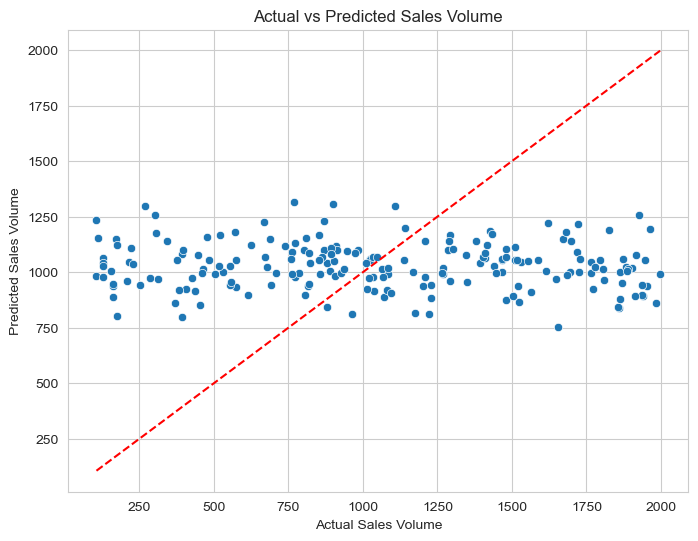

In [34]:
# : Visualizations


# Description:

#This scatter plot compares the actual sales volume with the predicted values from the Random Forest model.

#The red dashed line represents a perfect prediction line (actual = predicted).

# Points closer to the line indicate accurate predictions.

Helps to visually assess the model’s performance and identify any systematic over- or under-prediction.
plt.figure(figsize=(8,6))
sns.scatterplot(x=y_test, y=y_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Actual Sales Volume")
plt.ylabel("Predicted Sales Volume")
plt.title("Actual vs Predicted Sales Volume")
plt.show()




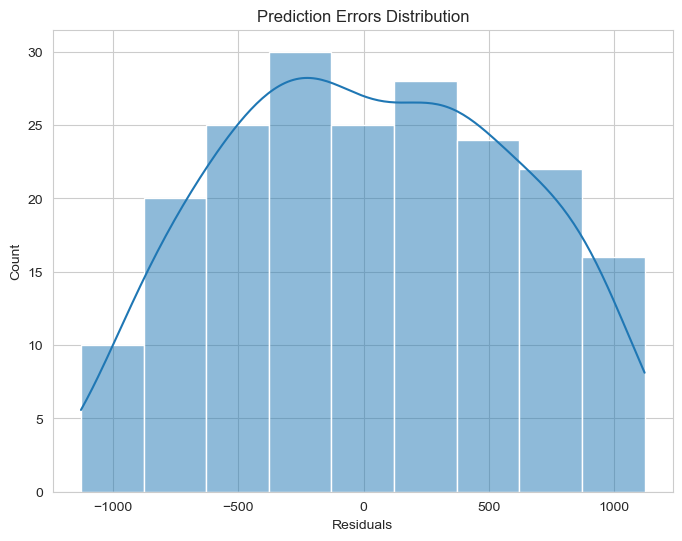

In [35]:
# Description:

# This histogram shows the distribution of residuals (difference between actual and predicted sales).

# A centered, symmetric distribution around zero indicates that the model has no significant bias.

# Peaks show where the model predictions are most frequently close to actual values.

Helps detect overfitting or underfitting issues.
# Residuals Distribution
residuals = y_test - y_pred
plt.figure(figsize=(8,6))
sns.histplot(residuals, kde=True)
plt.xlabel("Residuals")
plt.title("Prediction Errors Distribution")
plt.show()



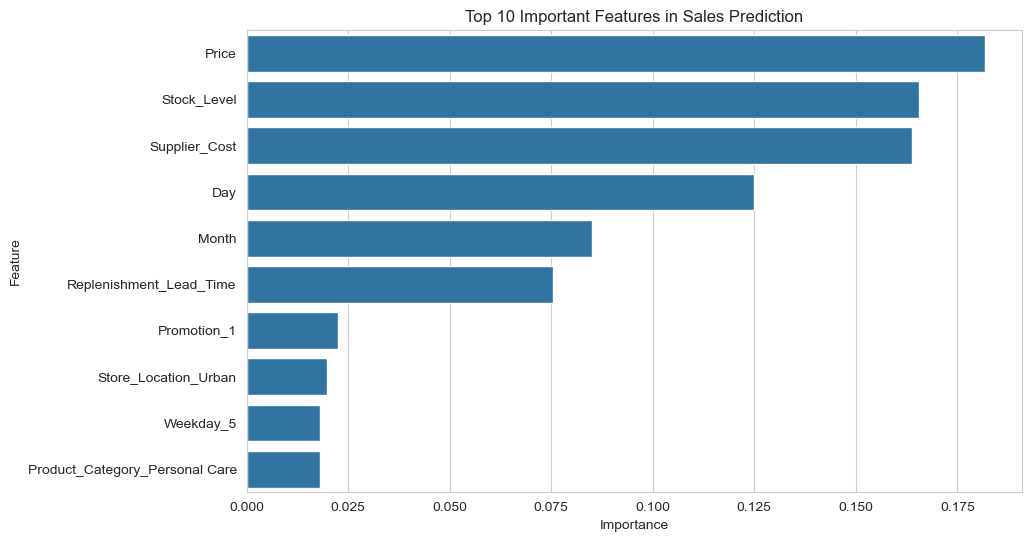

In [36]:
# Description:

# This histogram shows the distribution of residuals (difference between actual and predicted sales).

# A centered, symmetric distribution around zero indicates that the model has no significant bias.

# Peaks show where the model predictions are most frequently close to actual values.

# Helps detect overfitting or underfitting issues.

# Feature Importance
importances = rf_model.feature_importances_
features_names = X.columns

feature_df = pd.DataFrame({'Feature': features_names, 'Importance': importances})
feature_df = feature_df.sort_values(by='Importance', ascending=False).head(10)

plt.figure(figsize=(10,6))
sns.barplot(x='Importance', y='Feature', data=feature_df)
plt.title("Top 10 Important Features in Sales Prediction")
plt.show()


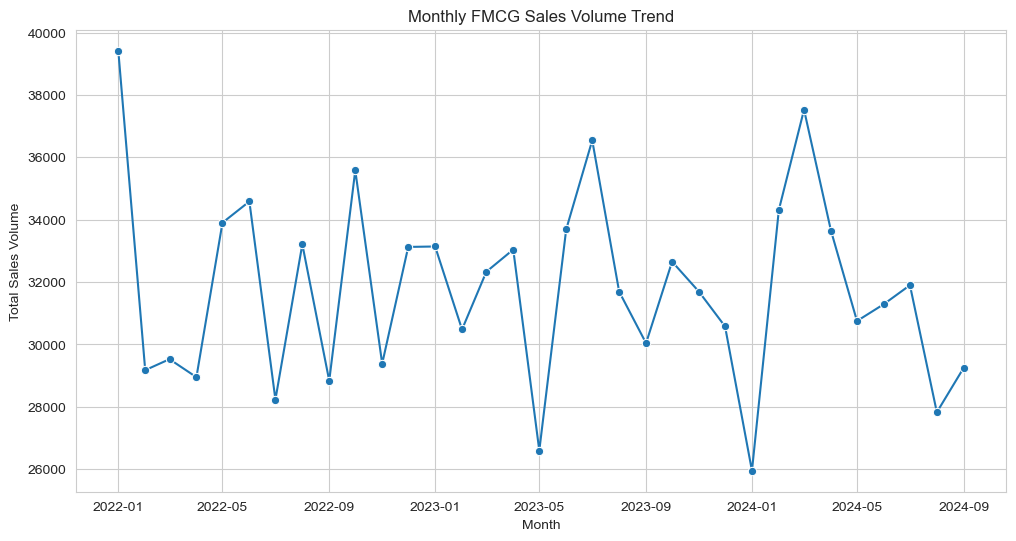

In [37]:
# Description:

# This line chart shows the total sales volume per month, revealing seasonal trends.

# Peaks indicate high-demand months, while dips indicate slow periods.

# Helps businesses plan inventory, promotions, and supply chain in advance.

# Can also be used for time series forecasting of future sales.

# Monthly Sales Forecast (Aggregate)
monthly_sales = df.groupby(df['Date'].dt.to_period('M'))['Sales_Volume'].sum().reset_index()
monthly_sales['Date'] = monthly_sales['Date'].dt.to_timestamp()

plt.figure(figsize=(12,6))
sns.lineplot(x='Date', y='Sales_Volume', data=monthly_sales, marker='o')
plt.title("Monthly FMCG Sales Volume Trend")
plt.xlabel("Month")
plt.ylabel("Total Sales Volume")
plt.show()


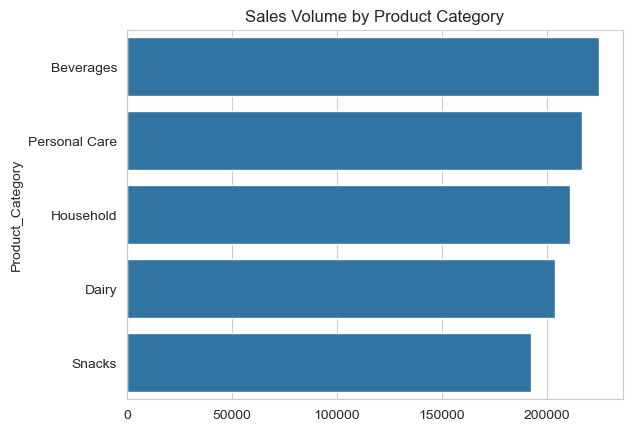

In [38]:
# Product Category vs Sales Volume (Bar Plot)
category_sales = df.groupby('Product_Category')['Sales_Volume'].sum().sort_values(ascending=False)
sns.barplot(x=category_sales.values, y=category_sales.index)
plt.title("Sales Volume by Product Category")
plt.show()


In [39]:
#Insight: Shows which categories contribute most to sales.

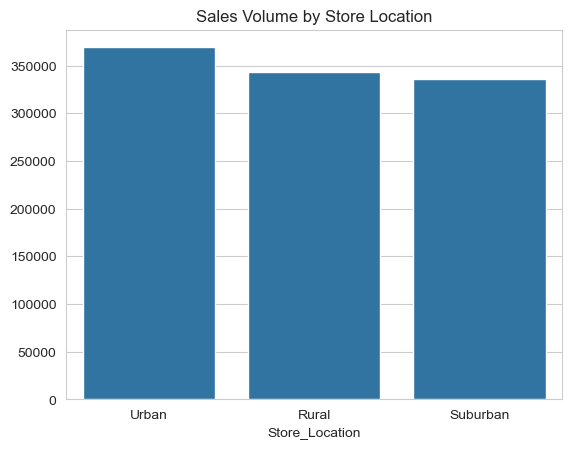

In [40]:
# Store Location vs Sales (Bar Plot)
location_sales = df.groupby('Store_Location')['Sales_Volume'].sum().sort_values(ascending=False)
sns.barplot(x=location_sales.index, y=location_sales.values)
plt.title("Sales Volume by Store Location")
plt.show()


In [41]:
# Insight: Identifies top-performing regions for targeted marketing.

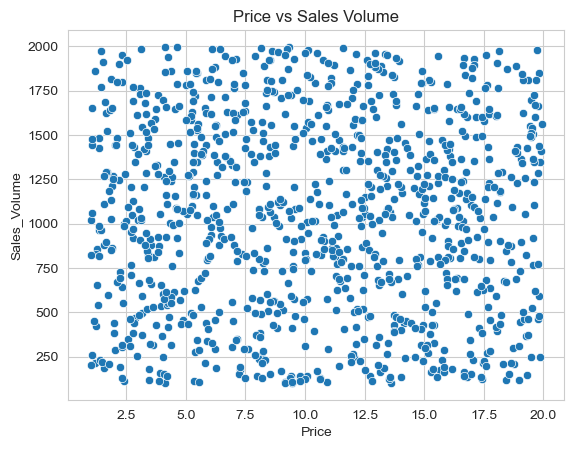

In [42]:
#Price vs Sales Volume (Scatter Plot)
sns.scatterplot(x='Price', y='Sales_Volume', data=df)
plt.title("Price vs Sales Volume")
plt.show()


In [ ]:
#Insight: Understands price elasticity and impact of pricing on sales.